# Requirements

In [47]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import missingno as msno 
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [2]:
df = pd.read_csv('data/vacation_preferences_data.csv')

In [3]:
df.shape

(52444, 14)

In [4]:
df.sample(5)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
33623,67.0,female,91865,master,5,hiking,1985,rural,NaN,257,summer,1,1,1
6672,51.0,non-binary,45994,high school,7,hiking,1731,suburban,23.0,160,summer,1,0,1
21553,38.0,male,23535,doctorate,4,swimming,759,rural,147.0,141,winter,0,1,0
25287,44.0,female,76848,bachelor,7,swimming,4312,urban,145.0,8,fall,1,0,0
46900,56.0,female,106344,bachelor,8,sunbathing,773,urban,65.0,22,winter,1,1,0


Preprocess the input and the output variables appropriately.

In [5]:
df.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level           2622
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
dtype: int64

In [6]:
df['Education_Level'].unique()

array(['bachelor', 'master', 'high school', 'doctorate', nan],
      dtype=object)

In [7]:
encoder = OrdinalEncoder()
df[['Education_Level']] = encoder.fit_transform(df[['Education_Level']])

In [8]:
df['Preferred_Activities'].unique()

array(['skiing', 'swimming', 'hiking', 'sunbathing'], dtype=object)

In [9]:
dummies = pd.get_dummies(df['Preferred_Activities'])
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Preferred_Activities', 'sunbathing'], inplace=True)

In [10]:
encoder = OrdinalEncoder()
df[['Gender']] = encoder.fit_transform(df[['Gender']]) 

In [11]:
encoder = OrdinalEncoder()
df[['Favorite_Season']] = encoder.fit_transform(df[['Favorite_Season']]) 

In [12]:
df['Location'].unique()

array(['urban', 'suburban', 'rural'], dtype=object)

In [13]:
dummies = pd.get_dummies(df['Location'])
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Location', 'suburban'], inplace=True)

In [14]:
df.sample(5)

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,hiking,skiing,swimming,rural,urban
42076,22.0,1.0,37889,NaN,3,4641,206.0,166,3.0,1,0,0,False,False,False,True,False
48471,49.0,2.0,83159,NaN,1,2142,254.0,7,1.0,1,0,0,True,False,False,False,False
49446,24.0,0.0,83651,0.0,6,3151,9.0,274,1.0,0,1,0,False,False,False,True,False
13573,22.0,0.0,33880,1.0,0,1580,279.0,232,3.0,1,1,0,False,False,False,False,False
29702,63.0,2.0,34471,0.0,5,4685,220.0,68,0.0,0,0,0,False,True,False,True,False


Explore the dataset using visualizations of your choice.

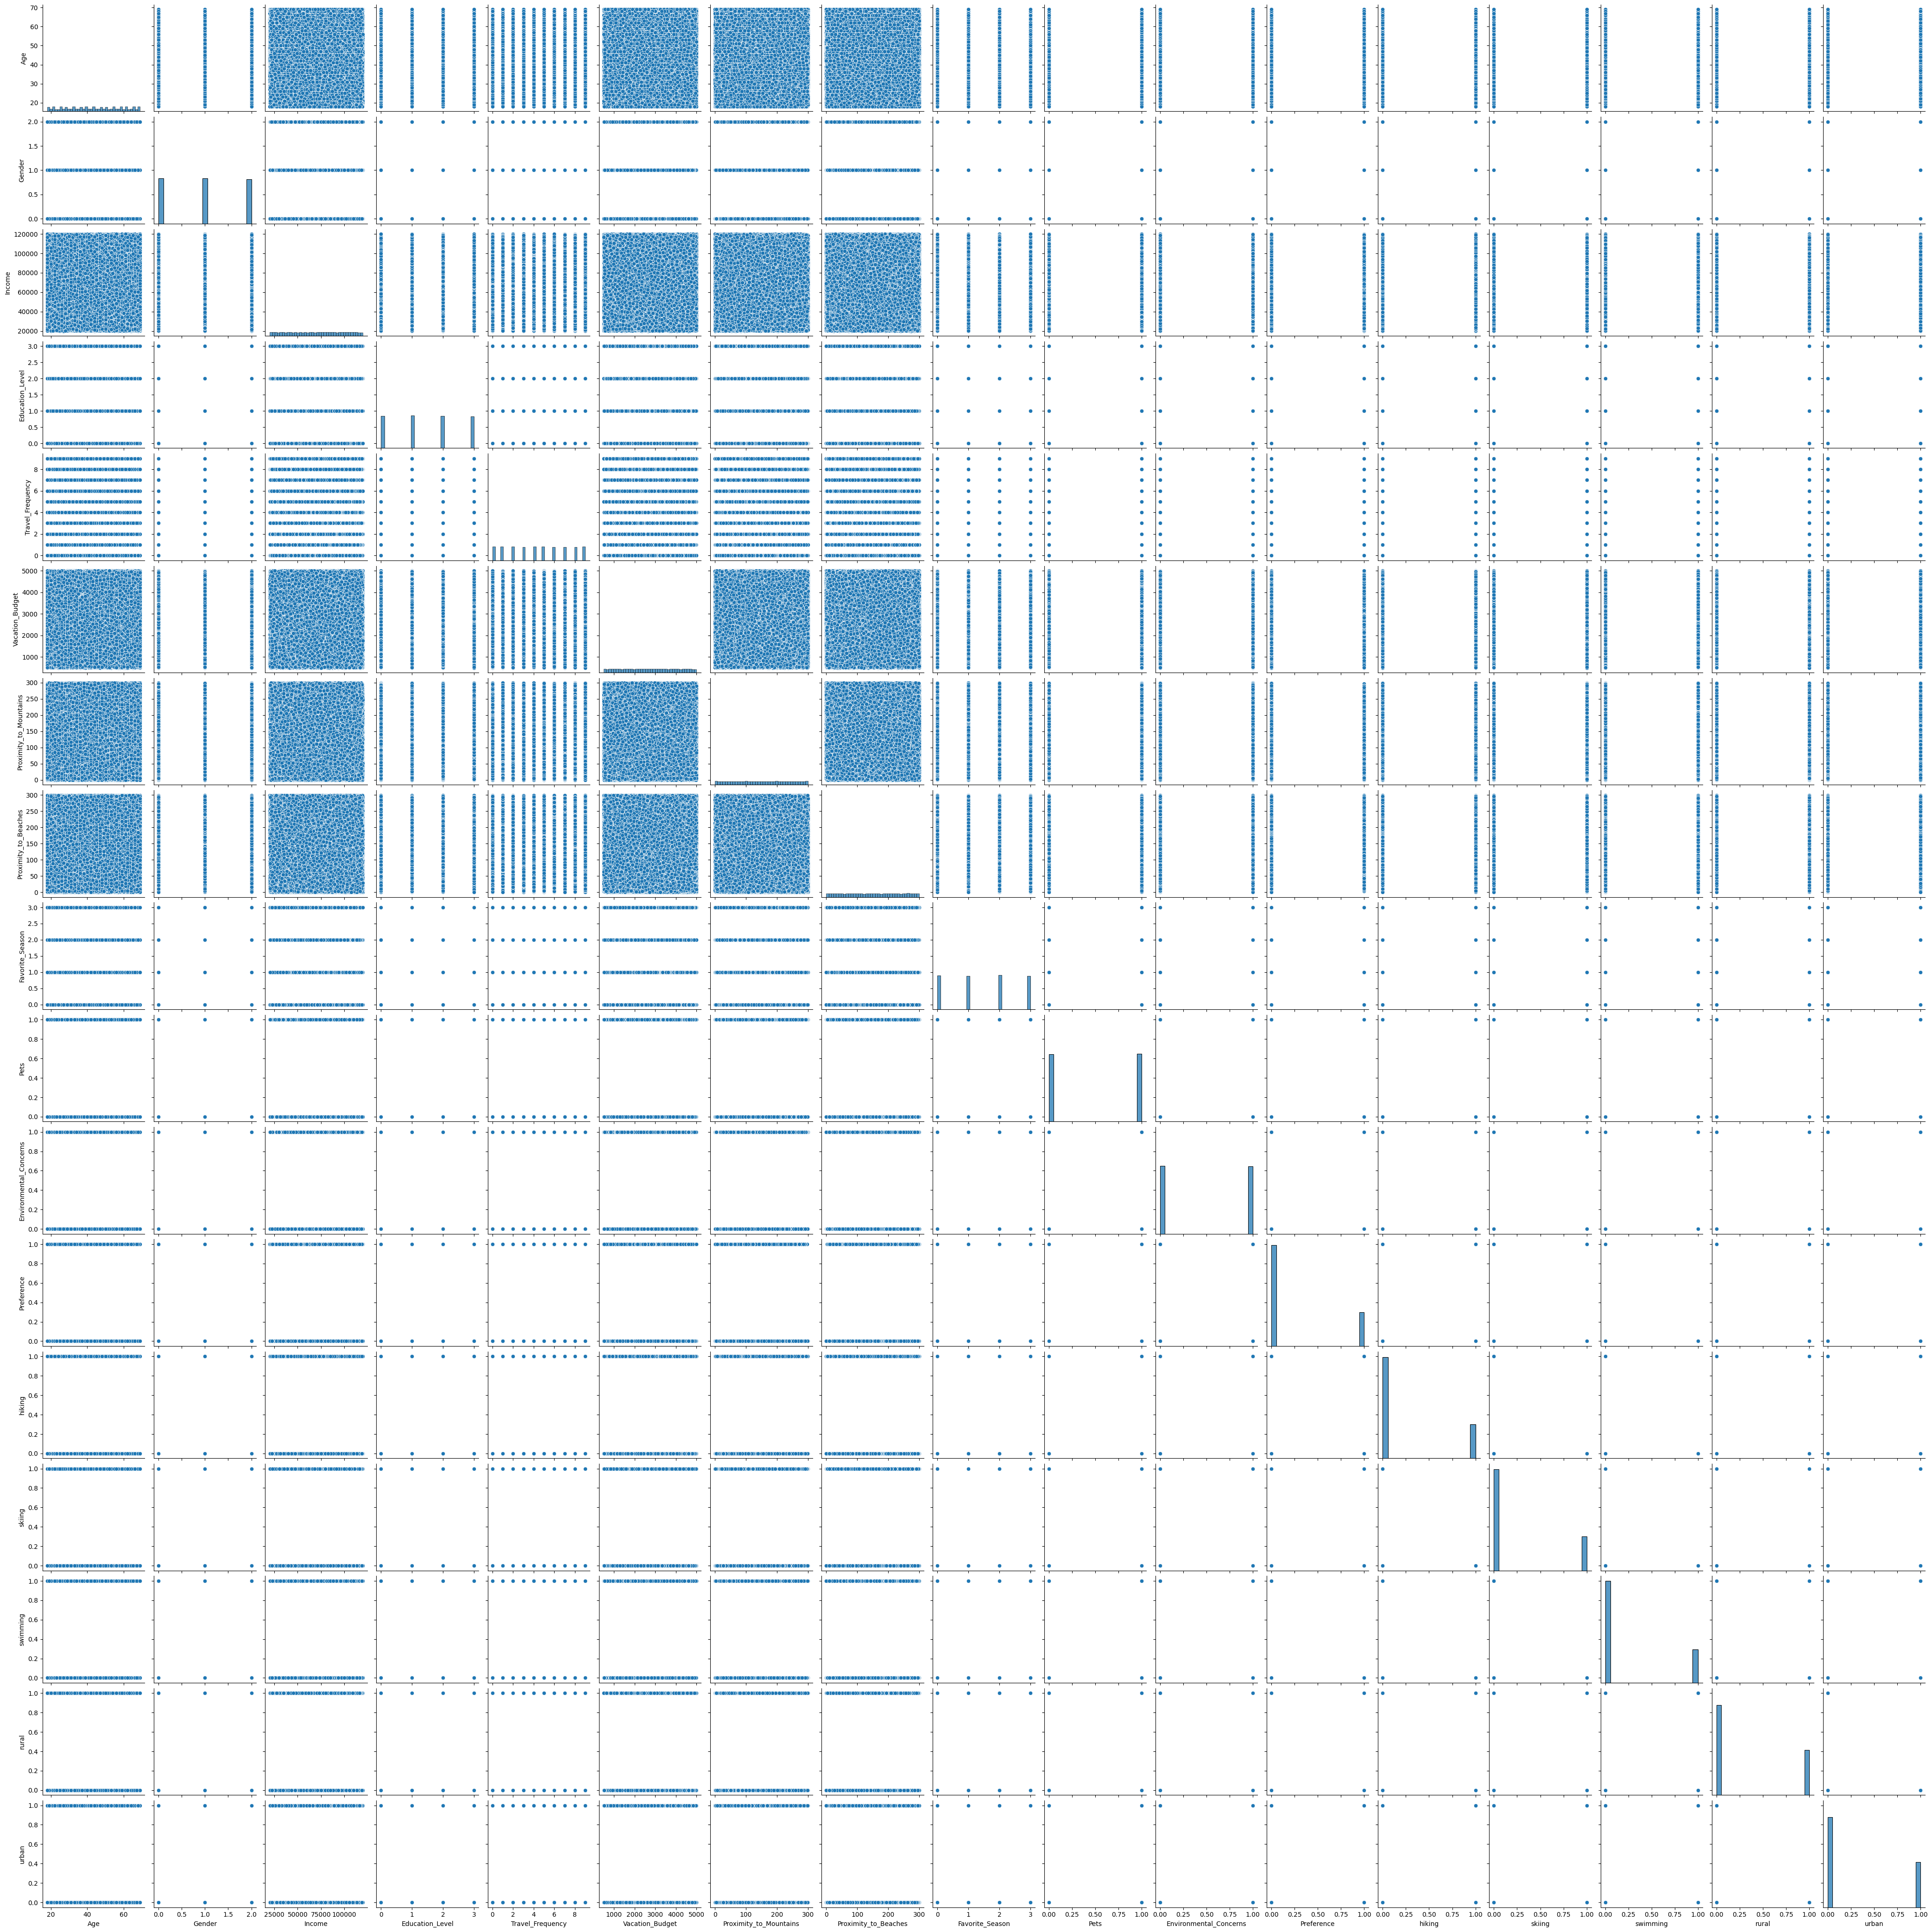

In [15]:
sns.pairplot(df)

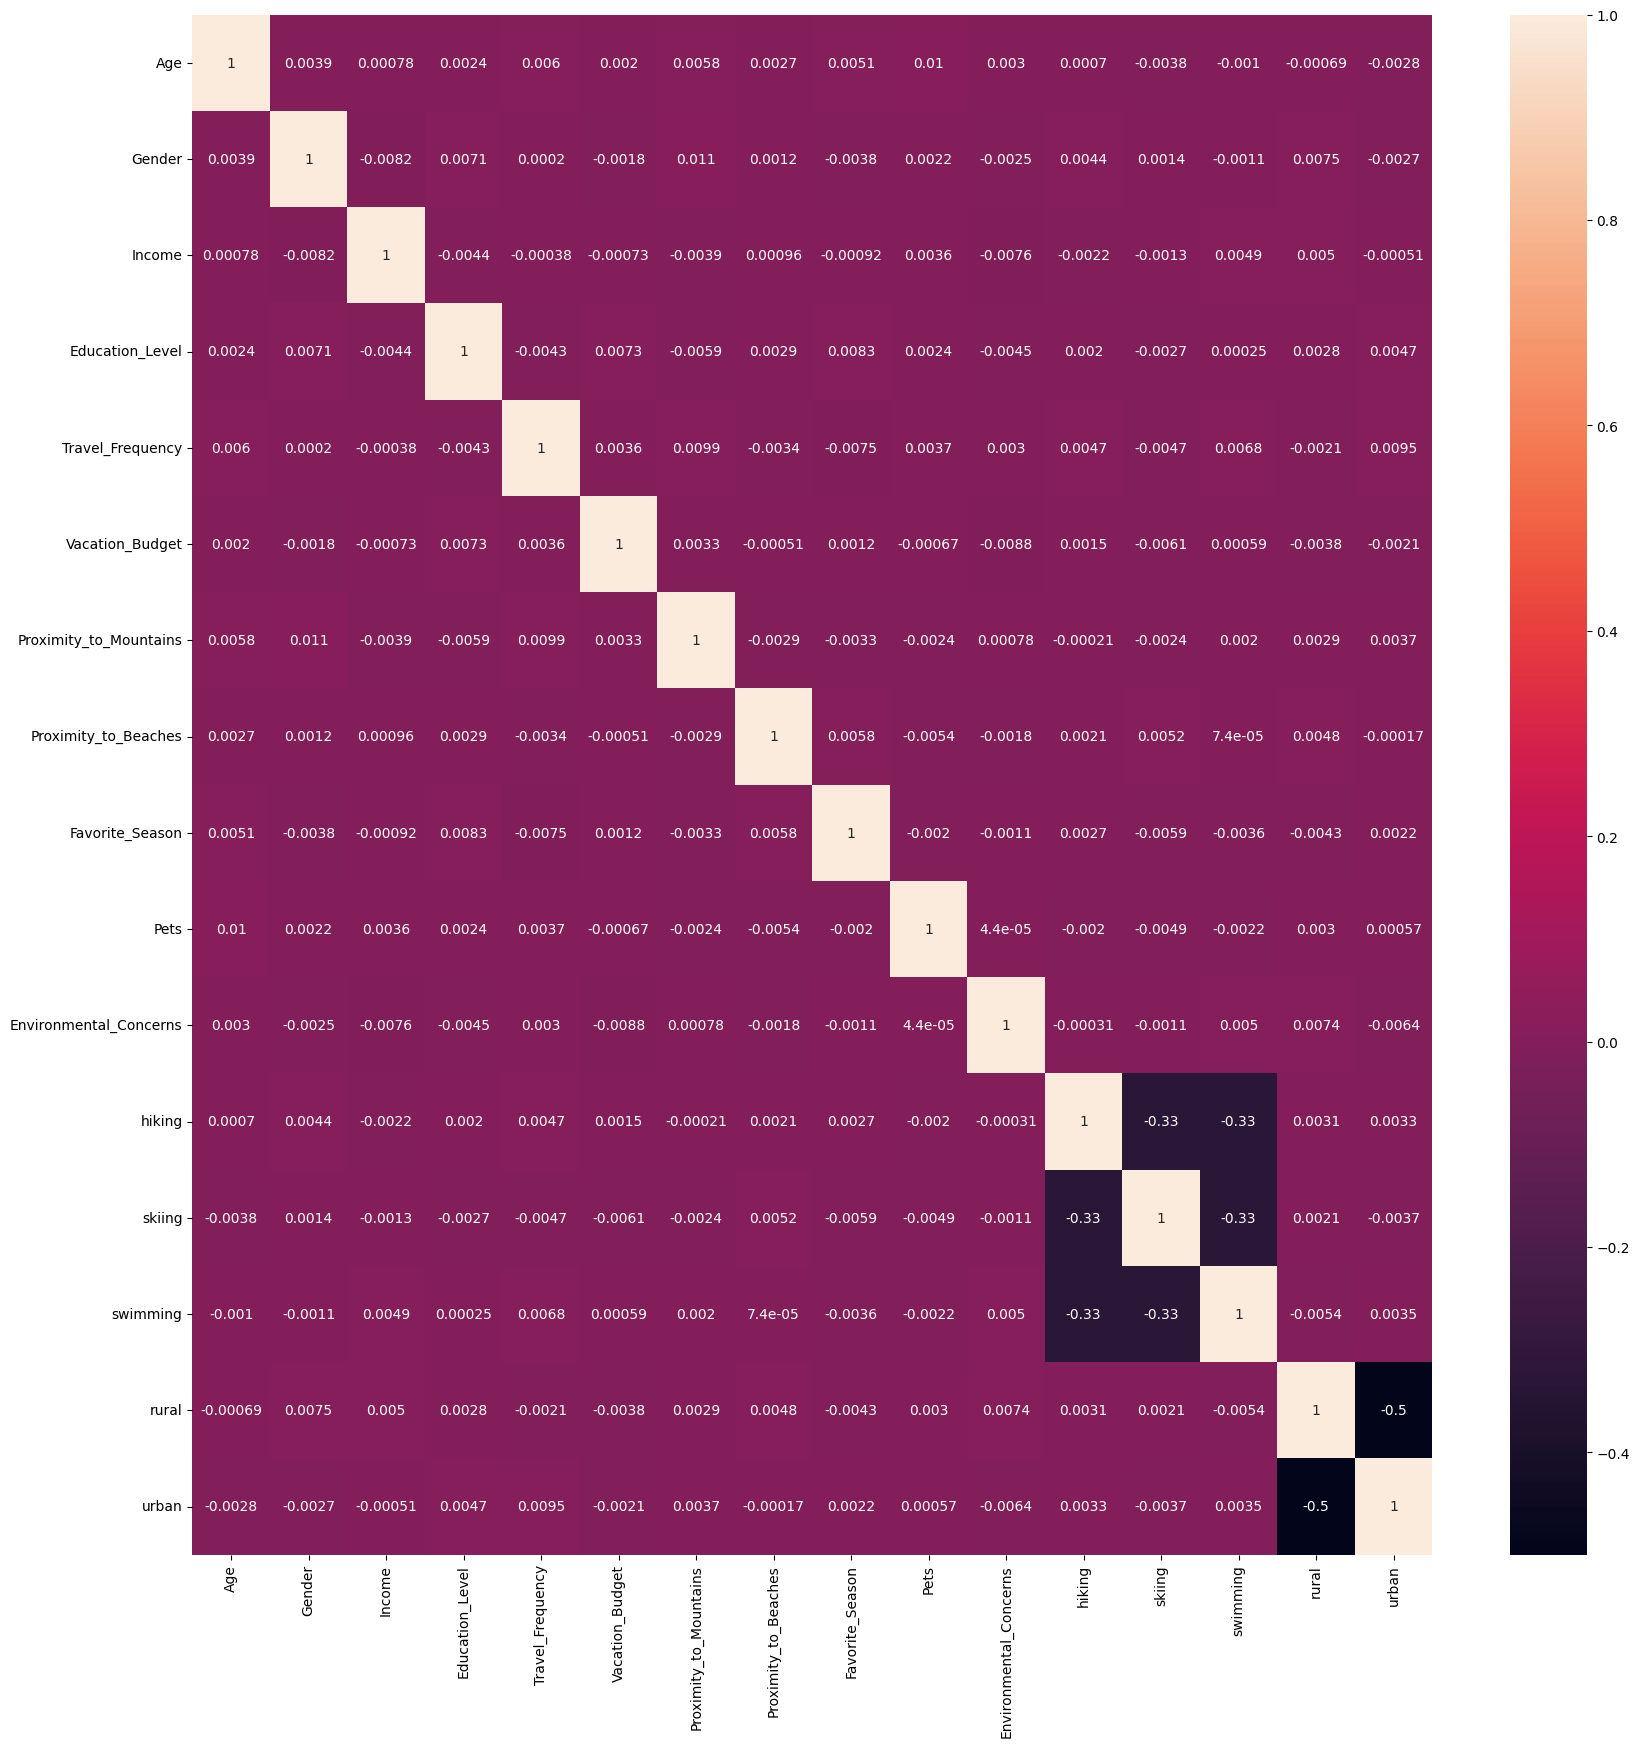

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns='Preference').corr(), annot=True)
plt.show()

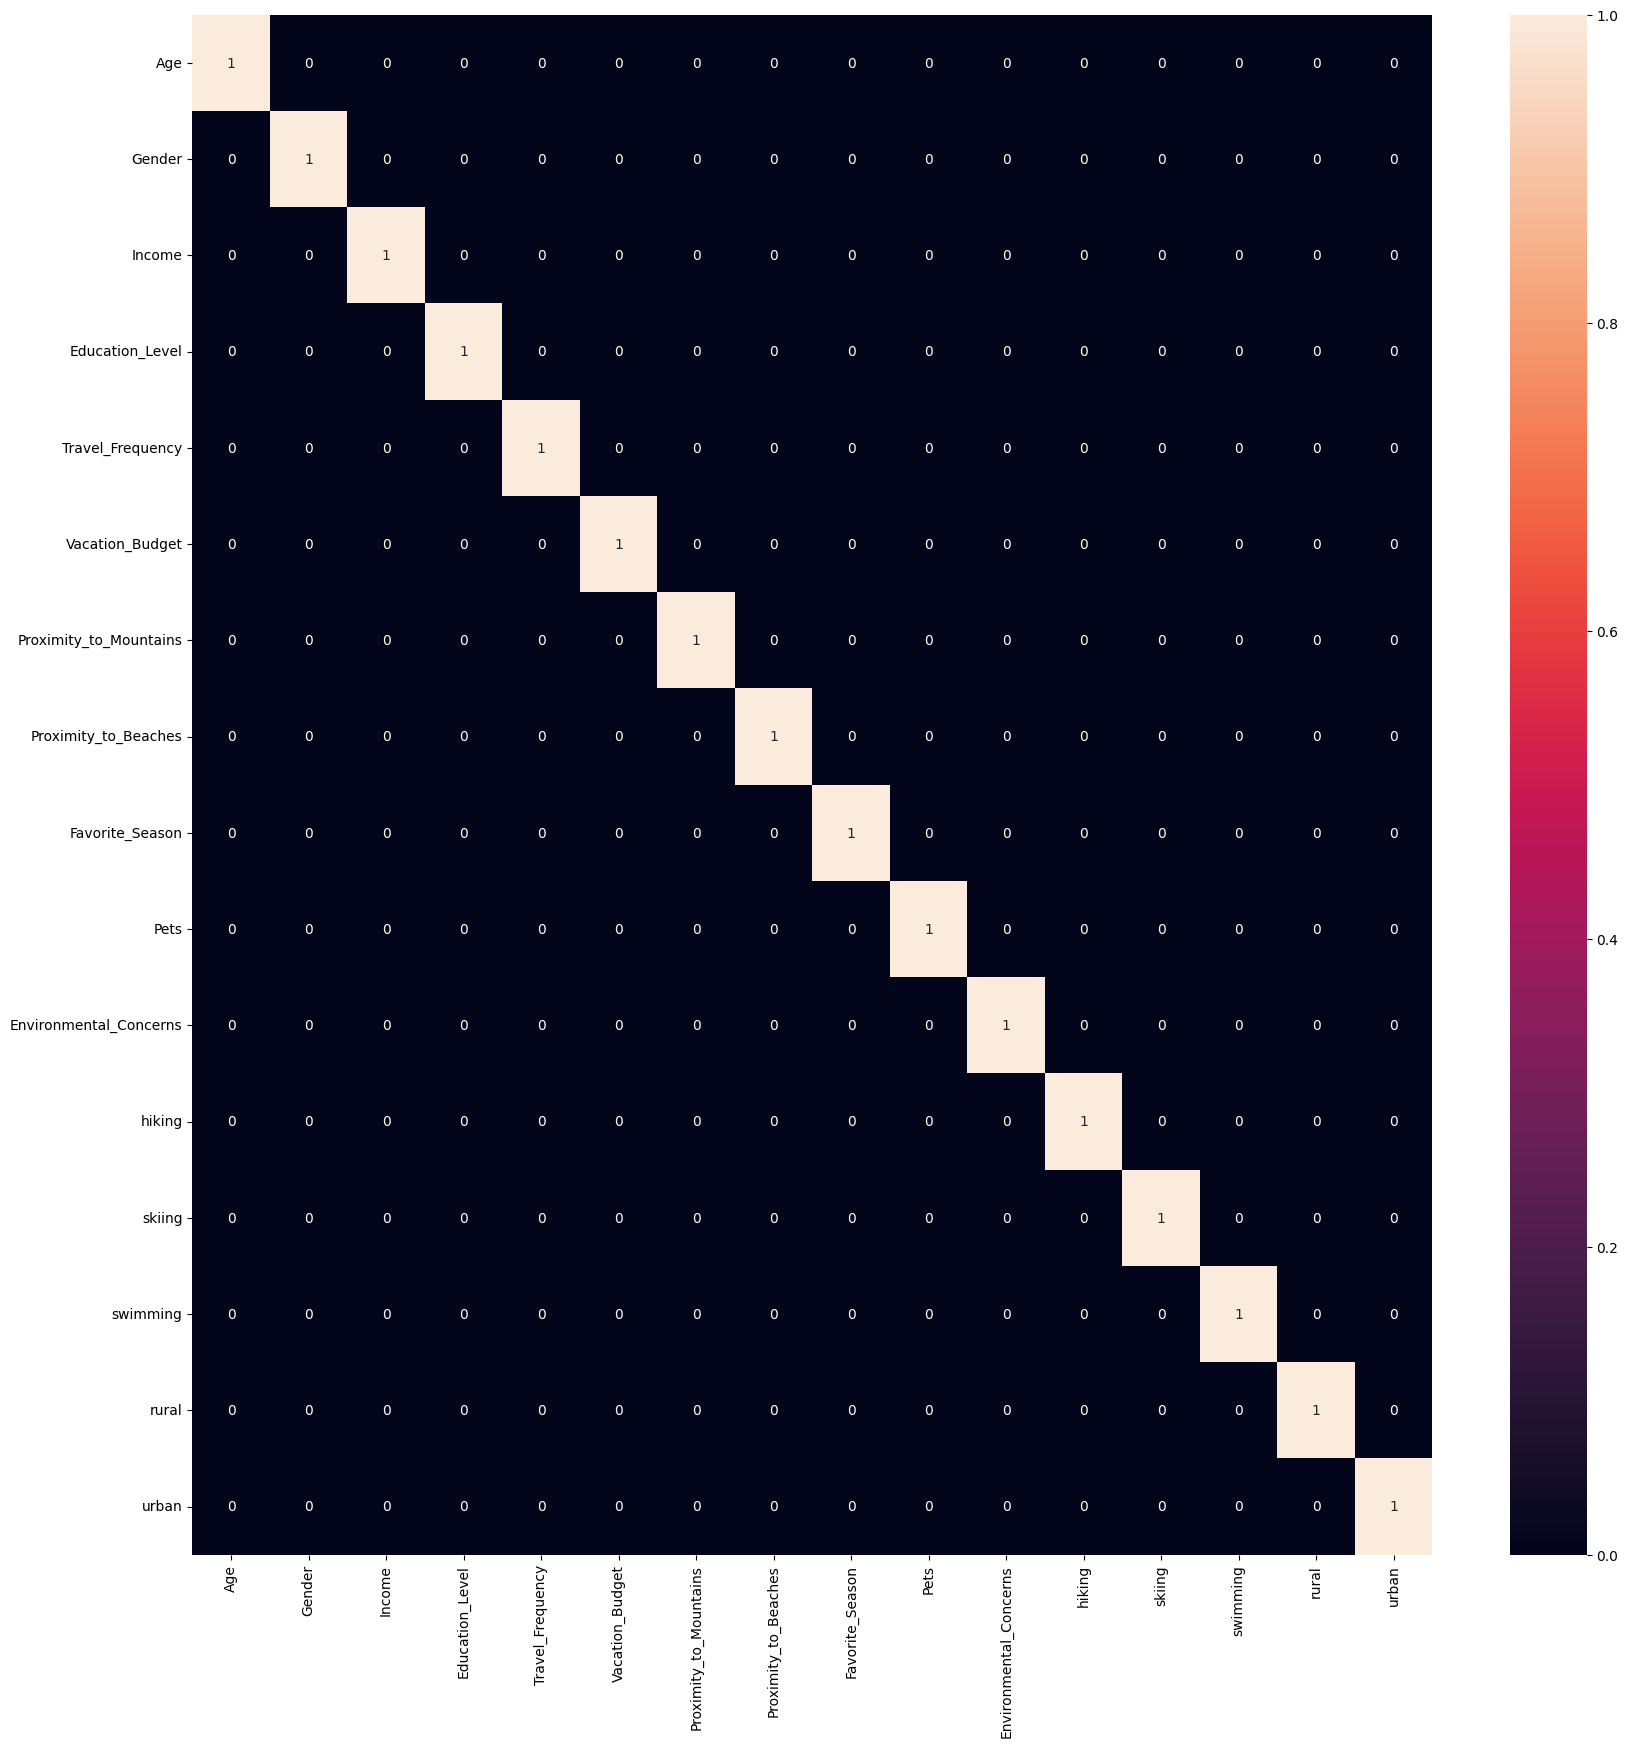

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(df.drop(columns='Preference').corr())>0.5, annot=True)
plt.show()

Check if the dataset is balanced.

In [22]:
df['Preference'].value_counts()

Preference
0    39296
1    13148
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [27]:
df.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level           2622
Travel_Frequency             0
Vacation_Budget              0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
hiking                       0
skiing                       0
swimming                     0
rural                        0
urban                        0
dtype: int64

In [28]:
df.isnull().sum() / len(df) * 100

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           4.999619
Travel_Frequency          0.000000
Vacation_Budget           0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
Favorite_Season           0.000000
Pets                      0.000000
Environmental_Concerns    0.000000
Preference                0.000000
hiking                    0.000000
skiing                    0.000000
swimming                  0.000000
rural                     0.000000
urban                     0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

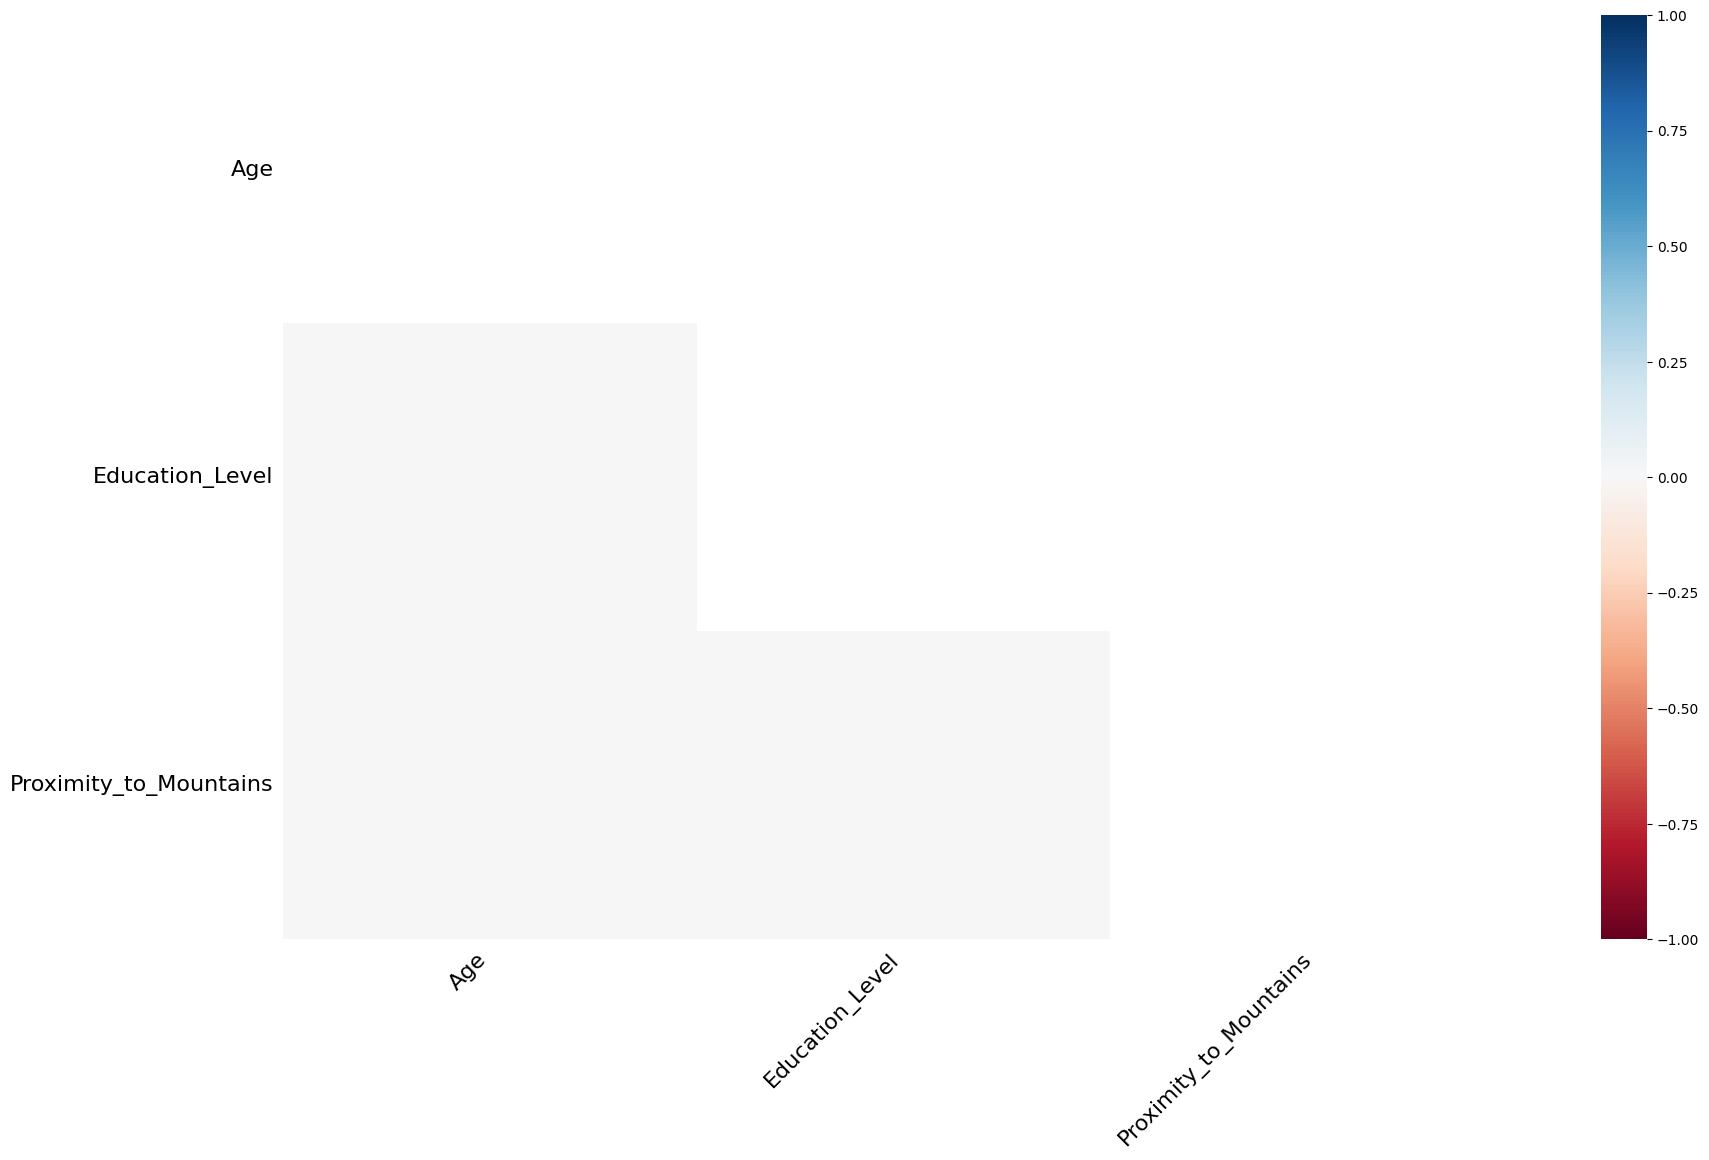

In [23]:
msno.heatmap(df)

<Axes: >

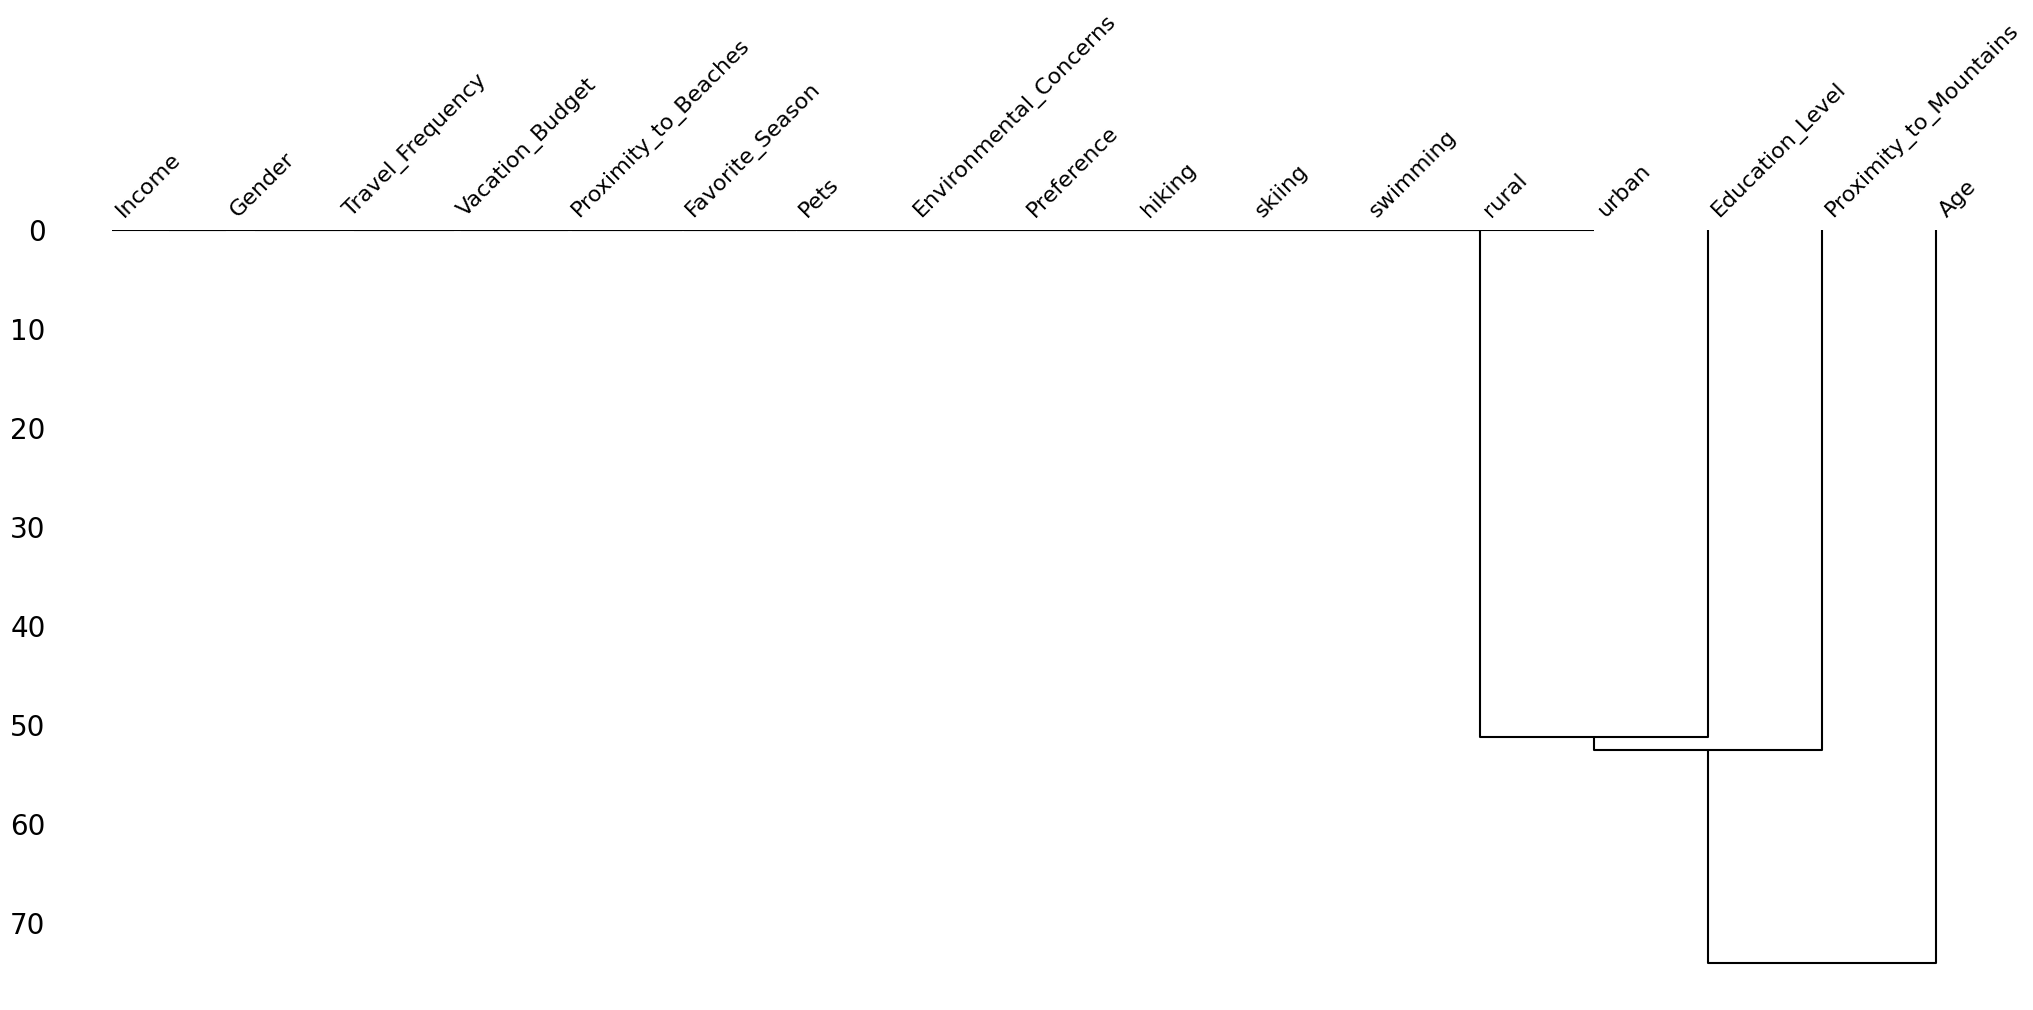

In [24]:
msno.dendrogram(df)

<Axes: >

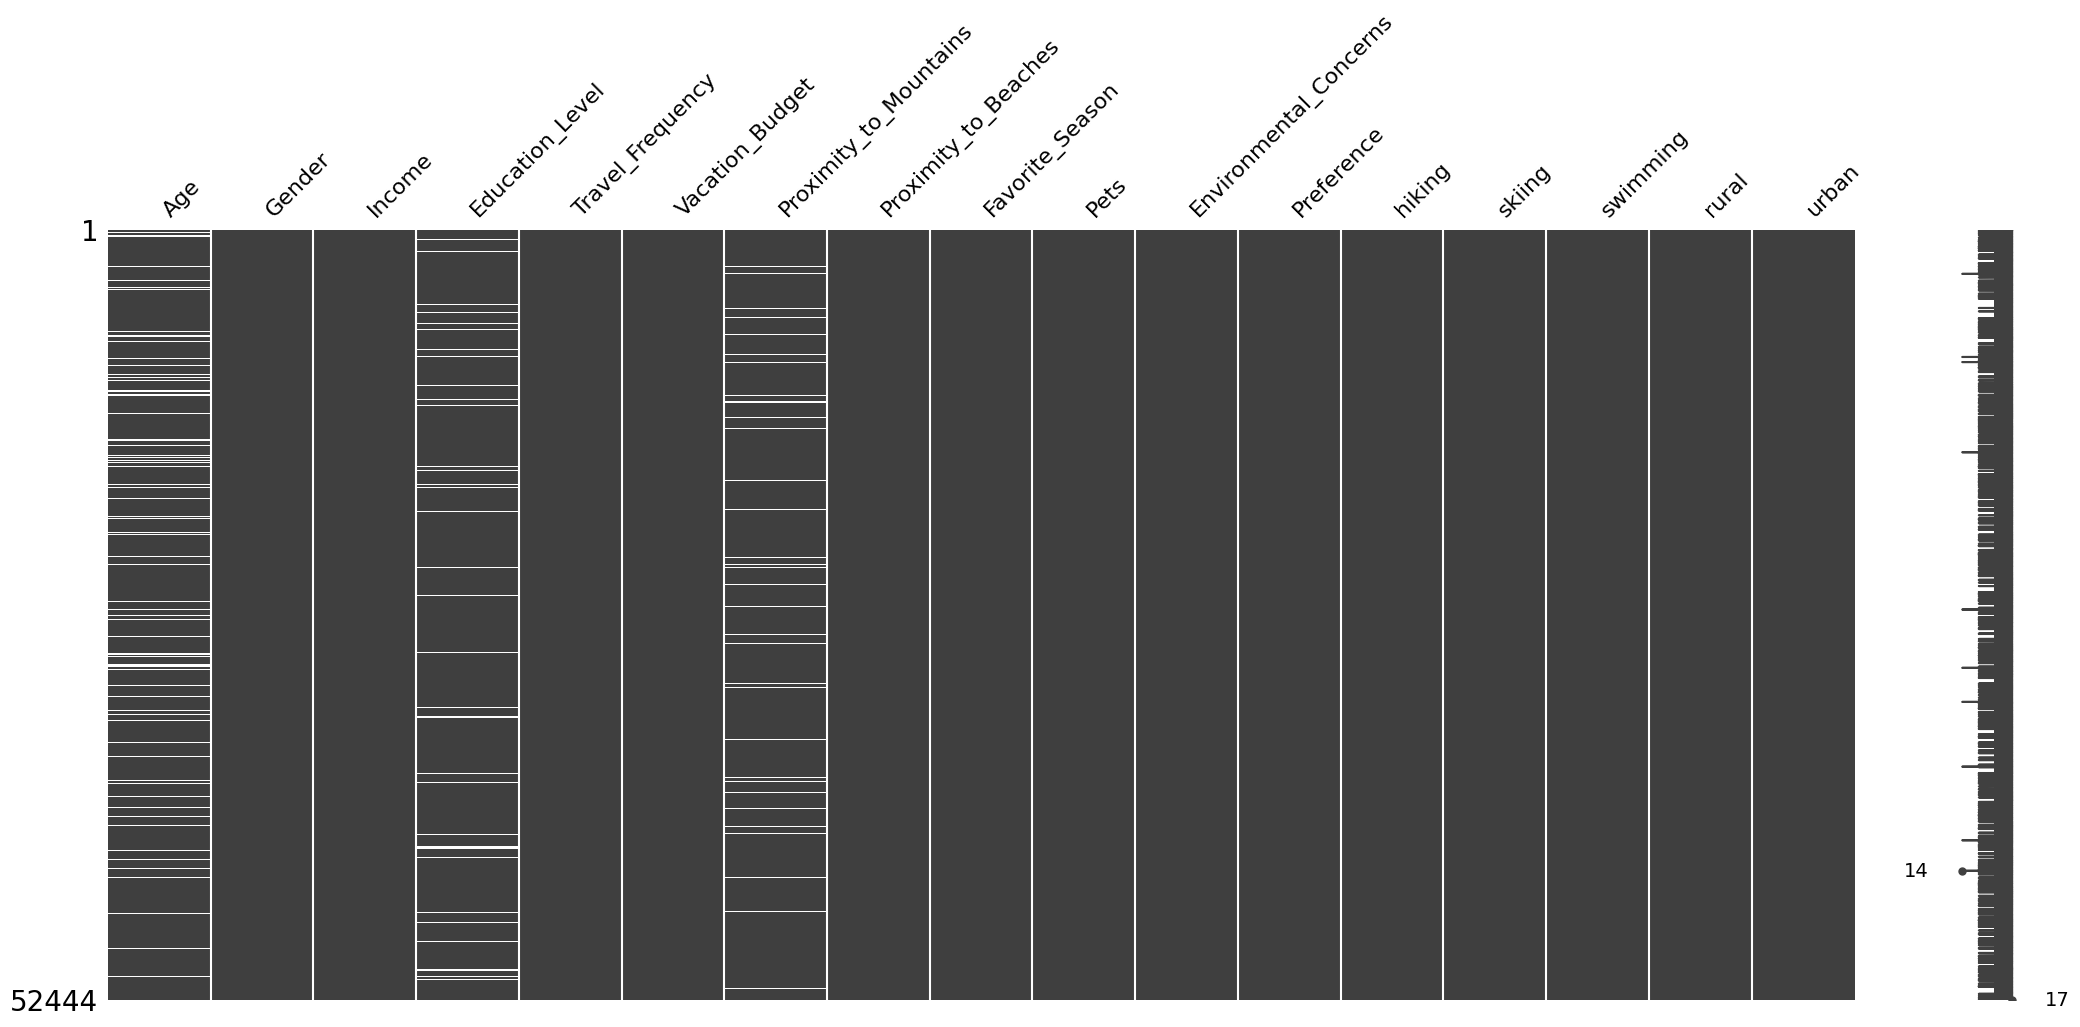

In [30]:
msno.matrix(df)

<Axes: >

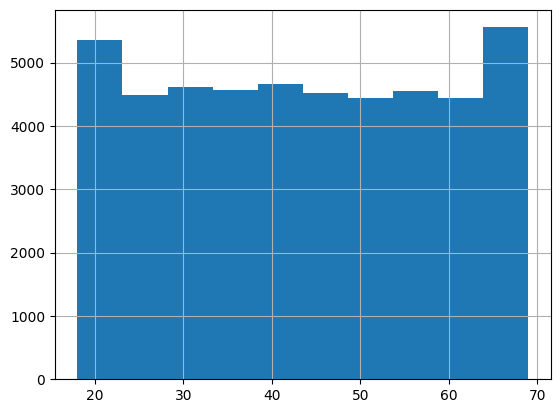

In [31]:
df['Age'].hist()

<Axes: >

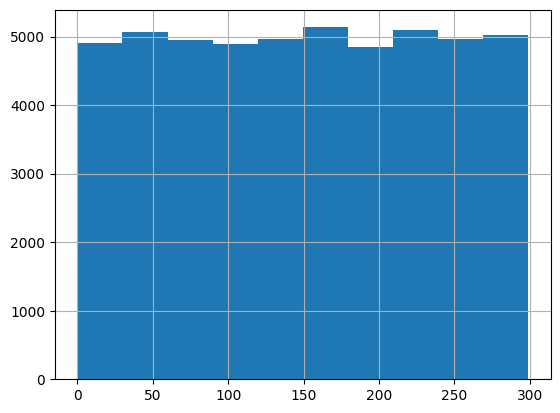

In [32]:
df['Proximity_to_Mountains'].hist()

<Axes: >

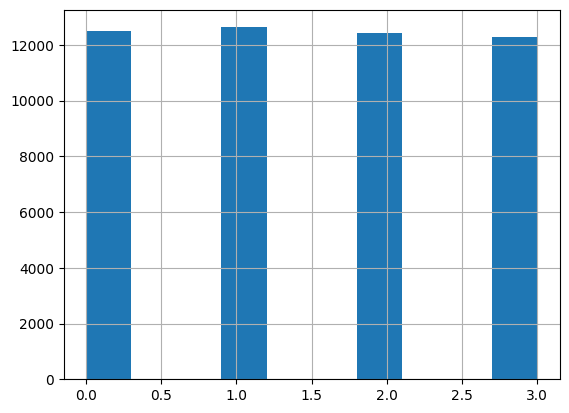

In [34]:
df['Education_Level'].hist()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [37]:
imputer = IterativeImputer()

In [38]:
df[['Age', 'Education_Level']] = imputer.fit_transform(df[['Age', 'Education_Level']])

In [39]:
df['Proximity_to_Mountains'] = df['Proximity_to_Mountains'].fillna(df['Proximity_to_Mountains'].median())

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [42]:
X, y = df.drop(columns='Preference'), df['Preference']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling
Standardize the features appropriately.

In [45]:
scaler = MinMaxScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [48]:
model = RandomForestClassifier()

In [50]:
model.fit(X_train, y_train)

RandomForestClassifier()

Use the trained model to make predictions for the test set.

In [51]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7836
           1       0.98      0.97      0.98      2653

    accuracy                           0.99     10489
   macro avg       0.99      0.98      0.98     10489
weighted avg       0.99      0.99      0.99     10489

